In [1]:
# Import some necessary packages

import Ford_Fulkerson as FF
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Enter the vertex number: 5

 [[0 4 3 0 0 3 4]
 [0 0 1 0 1 3 4]
 [0 0 0 0 0 0 2]
 [0 0 0 0 1 2 1]
 [0 0 0 0 0 0 3]
 [0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0]]


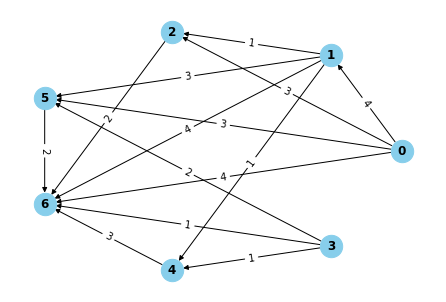

In [2]:
# Choose the inner node number to generate adjacency matrix and print the DAG graph

node_num = int(input("Enter the vertex number: "))

node_num += 2

graph = np.random.randint(5, size = (node_num, node_num))

# Build the graph made by C++

G = nx.DiGraph()
g = FF.Graph(node_num)
for i in range(node_num):
    for j in range(node_num):
        if ((i == j) | (i > j)):
            graph[i, j] = 0
        if graph[i, j] != 0:
            g.addEdge(i, j, graph[i, j])
            G.add_edge(i, j, weight=graph[i, j])
            
print("\n", graph)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', arrows=True)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [3]:
# Build more objects made by C++
# Set the route from source to sink

result = FF.fordFulkerson(g, 0, node_num-1)
allPaths = result.getAugmentingPaths()
allCapacities = result.getAugmentingPathsCapacities()

In [4]:
# Print information about maximum flow and each augmenting path

print("Max flow: ",result.getMaxFlow())
print("Augmenting Paths:")

for i in range(len(allPaths)):
    print("Path ", i+1, " (Capacity: ", allCapacities[i], "): ", sep = "", end = "")
    for j in range(len(allPaths[i])):
        print(allPaths[i][j], end = " ")
    print()

Max flow:  12
Augmenting Paths:
Path 1 (Capacity: 4): 0 6 
Path 2 (Capacity: 4): 0 1 6 
Path 3 (Capacity: 2): 0 2 6 
Path 4 (Capacity: 2): 0 5 6 


Path 1 (Capacity: 4): 


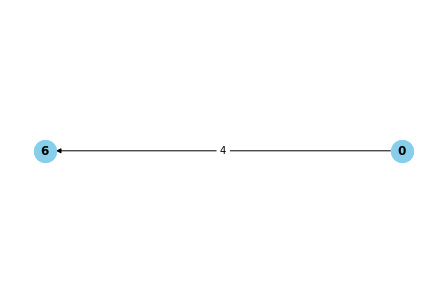

Path 2 (Capacity: 4): 


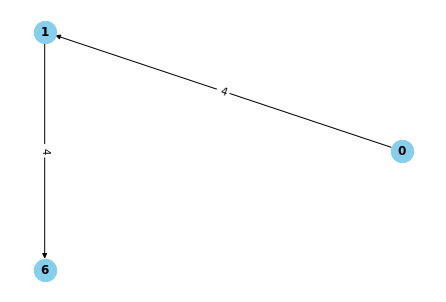

Path 3 (Capacity: 2): 


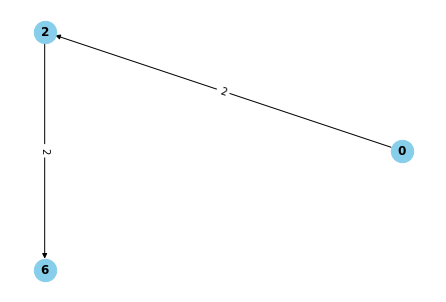

Path 4 (Capacity: 2): 


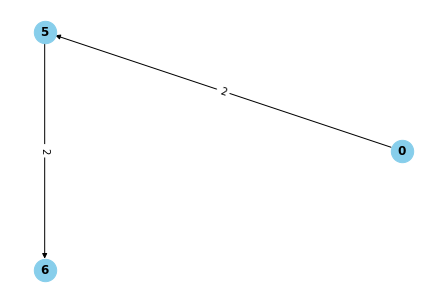

In [5]:
# Print each augmenting path's graph

for i in range(len(allPaths)):
    print("Path ", i+1, " (Capacity: ", allCapacities[i], "): ", sep = "")
    G = nx.DiGraph()
    for j in range(1, len(allPaths[i])):
        G.add_edge(allPaths[i][j-1], allPaths[i][j], weight=allCapacities[i])

    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', arrows=True)

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.show()